In [355]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years<br>
sex: The person's sex (1 = male, 0 = female)<br>
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)<br>
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)<br>
chol: The person's cholesterol measurement in mg/dl<br>
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)<br>
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)<br>
thalach: The person's maximum heart rate achieved<br>
exang: Exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)<br>
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)<br>
ca: The number of major vessels (0-4)<br>
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
target: Heart disease (0 = no, 1 = yes)<br>


### Data Analysis

In [6]:
df2 = df.copy()

In [12]:
df2.columns = ['age', 'sex', 'chest_pain_type', 'resisting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
               'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 
               'num_major_vessels', 'thalassemia', 'target']
df2.head(10)

,age,sex,chest_pain_type,resisting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [13]:
df2.nunique()

age                          41
sex                           2
chest_pain_type               4
resisting_blood_pressure     49
cholesterol                 152
fasting_blood_sugar           2
rest_ecg                      3
max_heart_rate_achieved      91
exercise_induced_angina       2
st_depression                40
st_slope                      3
num_major_vessels             5
thalassemia                   4
target                        2
dtype: int64

In [15]:
df2.sex.unique()

array([1, 0], dtype=int64)

In [16]:
df2.chest_pain_type.unique()

array([3, 2, 1, 0], dtype=int64)

In [18]:
df2.fasting_blood_sugar.unique()

array([1, 0], dtype=int64)

In [19]:
df2.rest_ecg.unique()

array([0, 1, 2], dtype=int64)

In [20]:
df2.exercise_induced_angina.unique()

array([0, 1], dtype=int64)

In [21]:
df2.st_slope.unique()

array([0, 2, 1], dtype=int64)

In [22]:
df2.num_major_vessels.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [23]:
df2.thalassemia.unique()

array([1, 2, 3, 0], dtype=int64)

In [25]:
df2.target.unique()

array([1, 0], dtype=int64)

In [26]:
#change column values for better analysis
df2['sex'] = df2['sex'].replace(to_replace=[1,0], value=['male', 'female'])
df2['chest_pain_type'] = df2['chest_pain_type'].replace(to_replace =[0,1,2,3], value=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
df2.fasting_blood_sugar = df2.fasting_blood_sugar.replace(to_replace=[0,1], value=['lower than 120mg/ml', 'higher than 120mg/ml'])
df2.rest_ecg = df2.rest_ecg.replace(to_replace=[0,1,2], value=['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'])
df2.exercise_induced_angina = df2.exercise_induced_angina.replace(to_replace=[0,1], value=['no', 'yes'])
df2.st_slope = df2.st_slope.replace(to_replace=[0,1,2], value=['upsloping', 'flat', 'downsloping'])
df2.thalassemia = df2.thalassemia.replace(to_replace=[1,2,3], value=['normal', 'fixed defect','reversable defect'])

In [27]:
df2.head()

,age,sex,chest_pain_type,resisting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,higher than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [28]:
df2.sex.value_counts()

male      207
female     96
Name: sex, dtype: int64

In [30]:
df2.chest_pain_type.value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: chest_pain_type, dtype: int64

In [31]:
df2.fasting_blood_sugar.value_counts()

lower than 120mg/ml     258
higher than 120mg/ml     45
Name: fasting_blood_sugar, dtype: int64

In [32]:
df2.rest_ecg.value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

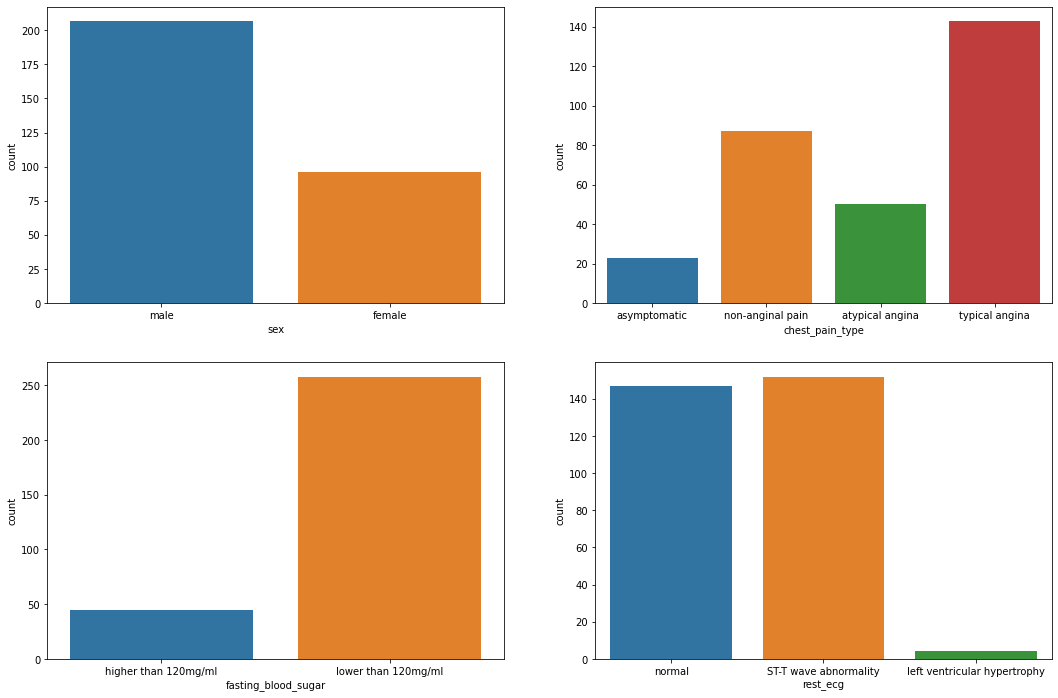

In [35]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='sex', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='chest_pain_type', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='fasting_blood_sugar', data=df2)

plt.subplot(2,2,4)
sns.countplot(x='rest_ecg', data=df2)

plt.show()

- in sex column male has the majority in the data
- typical angina is most popular in chest pain type in the data
- most of the persons in the data has fasting blood sugar lower than 120mg/ml in the data
- normal and ST-T wave abnormality have the majority in Resting electrocardiographic measurement in the data

In [37]:
df2.columns

Index(['age', 'sex', 'chest_pain_type', 'resisting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [38]:
df2.exercise_induced_angina.value_counts()

no     204
yes     99
Name: exercise_induced_angina, dtype: int64

In [39]:
df2.st_slope.value_counts()

downsloping    142
flat           140
upsloping       21
Name: st_slope, dtype: int64

In [40]:
df2.num_major_vessels.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64

In [41]:
df2.thalassemia.value_counts()

fixed defect         166
reversable defect    117
normal                18
0                      2
Name: thalassemia, dtype: int64

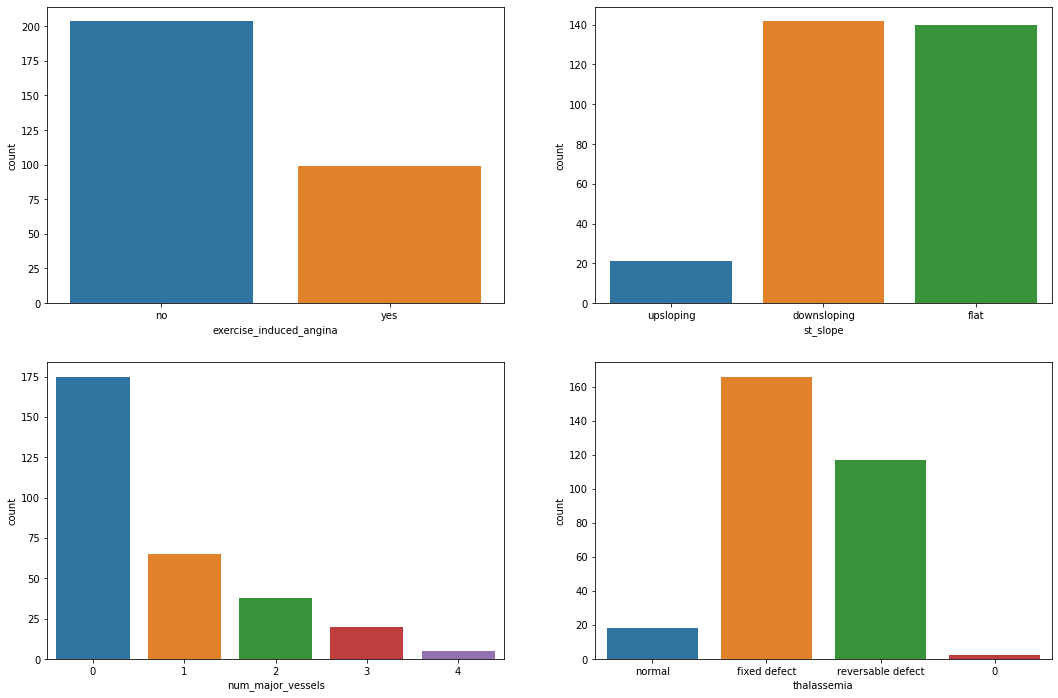

In [42]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='exercise_induced_angina', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='st_slope', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='num_major_vessels', data=df2)

plt.subplot(2,2,4)
sns.countplot(x='thalassemia', data=df2)

plt.show()

- no values in exercise_induced_angina is most popular in the data
- downsloping and flat are the most popular in the st_slop in the data
- 0 num_major_vessels has the majorityin the data
- fixed defect and reversable defect are the most popular in the data

In [46]:
df2.target = df2.target.replace(to_replace=[0,1], value=['no', 'yes'])

In [47]:
df2.target.value_counts()

yes    165
no     138
Name: target, dtype: int64

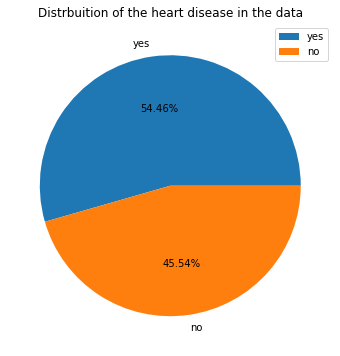

In [52]:
plt.figure(figsize=(12,6))
yes = df2.target[df2.target == 'yes'].count()
no = df2.target[df2.target == 'no'].count()
plt.title("Distrbuition of the heart disease in the data")
labels = ['yes', 'no']
plt.pie([yes, no], labels=labels, autopct="%.2f%%")
plt.legend()
plt.show()

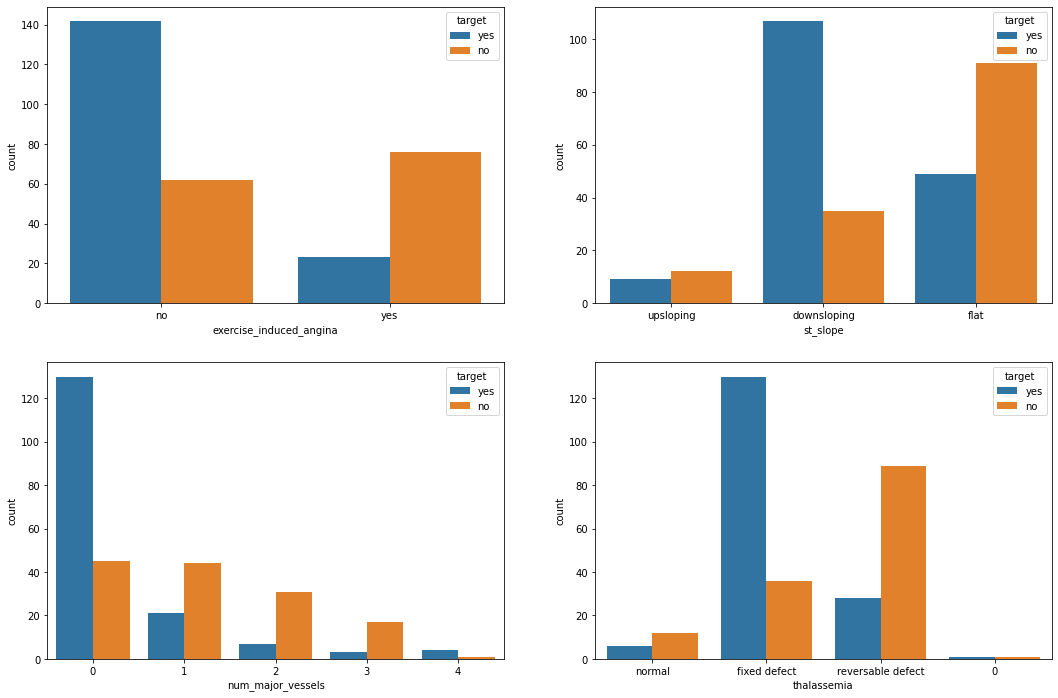

In [55]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.countplot(x='exercise_induced_angina', hue='target', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='st_slope', hue='target',data=df2)

plt.subplot(2,2,3)
sns.countplot(x='num_major_vessels', hue='target',data=df2)

plt.subplot(2,2,4)
sns.countplot(x='thalassemia', hue='target',data=df2)

plt.show()

- in the data  exercise_induced_angina when its value is No, then most people have heart disease, but exercise_induced_angina when its value is Yes, then most people do not have heart disease
- in the data when St_slop is downsloping most pepole are at risk of heart disease otherwise when St_slop is flat most pepole are less likely to get heart disease
- in the data if num_major_vessels = 0 pepole more likely to have heart disease 
- in the data if thalassemia = fixed defect pepole at risk of heart disease otherwise when thalassemia is reversable defect pepole are less likely to get heart disease

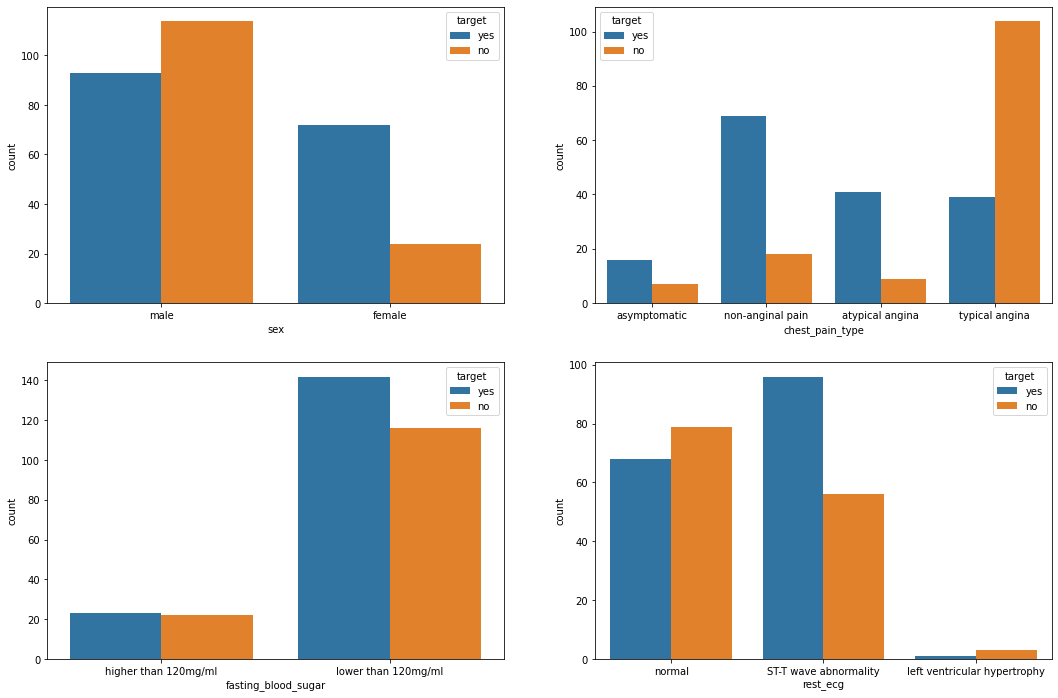

In [56]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='sex', hue='target',data=df2)

plt.subplot(2,2,2)
sns.countplot(x='chest_pain_type', hue='target', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='fasting_blood_sugar', hue='target',data=df2)

plt.subplot(2,2,4)
sns.countplot(x='rest_ecg', hue='target',data=df2)

plt.show()

- in the data There are men who do not have heart disease more than men who have heart disease, on the other hand there are women who have heart disease more than women who do not have heart disease <br>
- in the data People who have typical angina as the chest pain type most likely do not have heart disease, Any other chest pain type, you most likely have heart disease
- in the data You cannot clearly diagnose heart disease by fasting blood sugar
- in the data resesting electromagnetic when  = ST-T wave abnormality Pepole are more likely to have heart disease

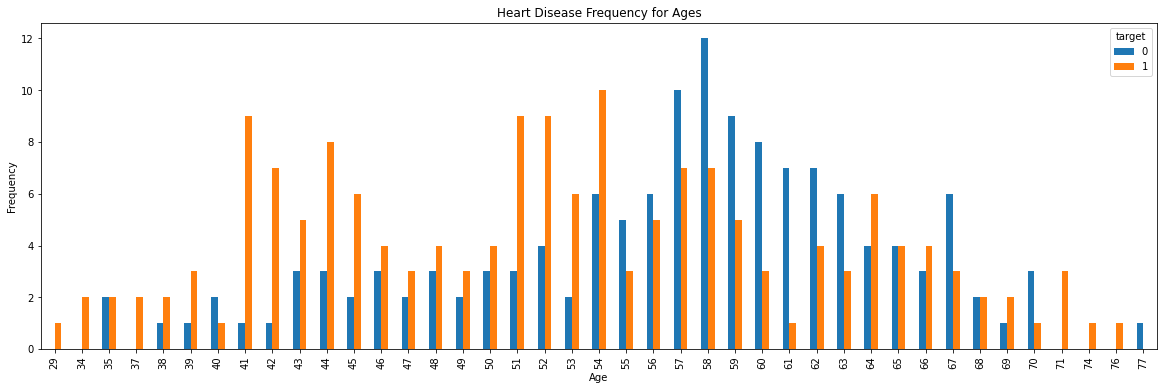

In [61]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

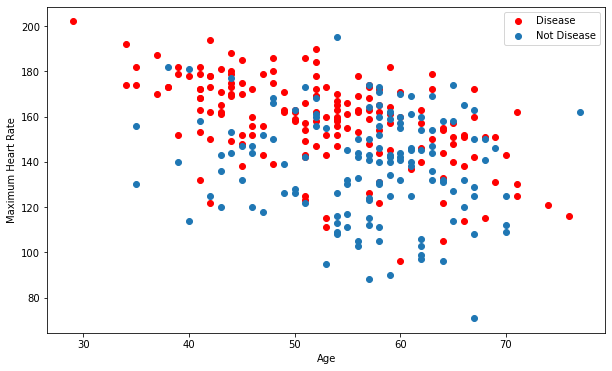

In [65]:
plt.figure(figsize=(10,6))
age_1 = df2.age[df.target==1]
age_0 = df2.age[df.target==0]
max_heart_1 = df2.max_heart_rate_achieved[(df2.target=='yes')]
max_heart_0 = df2.max_heart_rate_achieved[(df2.target=='no')]
plt.scatter(x= age_1, y= max_heart_1, c="red")
plt.scatter(x= age_0, y= max_heart_0)
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

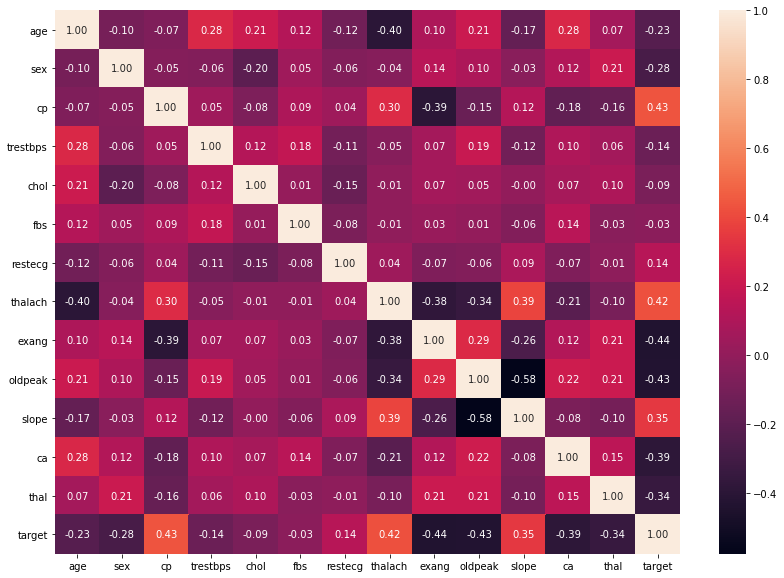

In [67]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

### Apply One Hot encoder

In [85]:
dummies = pd.get_dummies(df2, drop_first=True)
dummies.head(3)

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target_yes
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1
2,41,130,204,172,1.4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1


In [87]:
df3 = dummies
df3.head(10)

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target_yes
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1
2,41,130,204,172,1.4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1
5,57,140,192,148,0.4,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1
6,56,140,294,153,1.3,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1
7,44,120,263,173,0.0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1
8,52,172,199,162,0.5,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1
9,57,150,168,174,1.6,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1


### Assign Feature and target Variables

In [88]:
X = df3.drop('target_yes', axis=1)
y = df3.target_yes

### Apply Scaling

In [252]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

### Split the data into training and testing data

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size=0.25, random_state=60)

### Bulding and training the model

In [353]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Accuracy of the model

In [354]:
model.score(X_test, y_test)

0.881578947368421

### Save the model

In [356]:
joblib.dump(model, 'Hear Disease Model')

['Hear Disease Model']